<div>
    <img src='../pics/banner.PNG'/>
</div>
<div>
    <img width="10%" height="10%" src='../pics/python-programming.png'/>
    <img src='../pics/miw.PNG'/>
</div>
<div>
    <em>Author: Jeroen Boogaard</em>
</div>

---

<h1>Samengestelde variabelen - Dictionaries</h1>

**Een dictionary is een <u>mutable</u> dataverzameling van <u>key-value pairs</u>**

<h3>Imports</h3>

In [1]:
from PIL import Image
import csv
import json

<h3>Dictionary variabelen aanmaken en afdrukken</h3>

In [2]:
marslanderSpecs = { 'length': 6, 'width': 1.56, 'weight': 360, 'deckHeight': (83, 108), 'robotArmLength': 1.8, 'numberOfSolarPanels': 2}
marslanderSpecs.items()

dict_items([('length', 6), ('width', 1.56), ('weight', 360), ('deckHeight', (83, 108)), ('robotArmLength', 1.8), ('numberOfSolarPanels', 2)])

De <i>String Formatting Operator</i> maakt gebruik van een <i>tuple</i>

In [3]:
print(type(marslanderSpecs.get('deckHeight')))
print( 'The Deck Height of the Marslander has a range from %s to %s' %marslanderSpecs.get('deckHeight'))

<class 'tuple'>
The Deck Height of the Marslander has a range from 83 to 108


<h3>Elementen toevoegen</h3>

**Voeg elementen toe via een merge met een tweede dictionary**

In [4]:
marslanderSpecs = marslanderSpecs | {'scienceInstruments' : ("seismometer", "heat probe", "radio science experiment")}
print(marslanderSpecs)

{'length': 6, 'width': 1.56, 'weight': 360, 'deckHeight': (83, 108), 'robotArmLength': 1.8, 'numberOfSolarPanels': 2, 'scienceInstruments': ('seismometer', 'heat probe', 'radio science experiment')}


<h3>Excercise 1</h3>
<h4>Gegeven</h4>

In [5]:
imgTuple = ('image',"../pics/mars.nasa.jpg")

<h4>Gevraagd</h4>
<p>Voeg het element <i>image</i> toe m.b.v. de variabele <u>imgTuple</u>

<h4>Oplossing</h4>

In [6]:
# Merge with a second dictionary. This second dict first needs to be created from the imgTuple
marslanderSpecs = marslanderSpecs | {imgTuple[0]: imgTuple[1]}
marslanderSpecs

{'length': 6,
 'width': 1.56,
 'weight': 360,
 'deckHeight': (83, 108),
 'robotArmLength': 1.8,
 'numberOfSolarPanels': 2,
 'scienceInstruments': ('seismometer',
  'heat probe',
  'radio science experiment'),
 'image': '../pics/mars.nasa.jpg'}

<h3>Visualisatie</h3>

**Gebruik de Python Imaging Library (PIL) voor het renderen van een Image** 

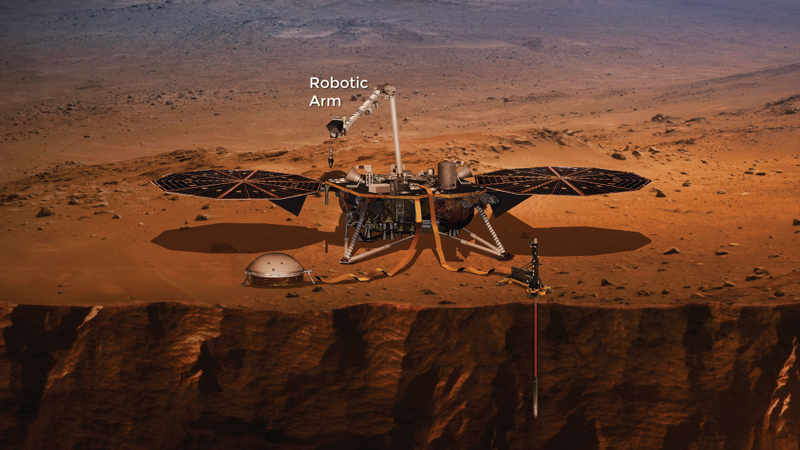

In [7]:
img = Image.open(imgTuple[1])
percentage = 0.4
width, height = img.size
resizedDimensions = (int(width * percentage), int(height * percentage))
resizedImg = img.resize(resizedDimensions)
resizedImg.show()

<h3>Exporteren</h3>

In [8]:
!mkdir ../json

mkdir: cannot create directory ‘../json’: File exists


**Gebruik de json library voor het exporteren naar een JSon-file**

In [9]:
with open("../json/marslander.json", "w") as outfile:
    json.dump(marslanderSpecs, outfile)

<h3>Excercise 2</h3>
<p>
    <ol>
        <li>Maak de directory <i>../csv</i> aan</li>
        <li>Exporteer de dictionary marslanderSpecs naar het bestand <i>csv/marslander.csv</i> m.b.v. de library <u>csv</i>
    </ol>
    <strong>TIP : </strong>Zoek op <a>https://stackoverflow.com/</a> naar geschikte voorbeelden
</p> 

In [10]:
!mkdir ../csv
import csv

mkdir: cannot create directory ‘../csv’: File exists


In [11]:
# example taken from https://docs.python.org/3/library/csv.html#csv.DictWriter
with open('../csv/marslander.csv', 'w', newline='') as csvfile:
    fieldnames = marslanderSpecs.keys()
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    writer.writerow(marslanderSpecs)

<h3>Mutaties</h3>

**Voorkom information loss door de inhoud van de dictionary eerst naar een ander plaats in het geheugen te kopiëren**

In [12]:
marslanderSpecsCopy = marslanderSpecs.copy()

<p>De volgorde van waarmee items uit een data colection worden gepopt is Last In First Out (LIFO)</p>

In [13]:
lastItem = marslanderSpecsCopy.popitem()
print(lastItem) 

('image', '../pics/mars.nasa.jpg')


<h3>Exercise 3</h3>
<h4>Gegeven</h4>

In [14]:
moonlanderSpecs = { 'name': "Apollo Lunar Module", 'length': 7.04, 'width': 9.4 }
moonlanderSpecsCopy = moonlanderSpecs

<h4>Gevraagd</h4>
<p>
Toon m.b.v. mutaties aan dat moonlanderSpecs en moonlanderSpecsCopy naar dezelfde plaats in het geheugen refereren. 
</p>

<h4>Oplossing</h4>

In [15]:
# popping items from the copy and show the item is also gone from the original
print(moonlanderSpecsCopy)
moonlanderSpecsCopy.popitem()
print(moonlanderSpecsCopy, moonlanderSpecs)
# the key "width" has been removed in the copy and the original, proving they point to the same memory address

{'name': 'Apollo Lunar Module', 'length': 7.04, 'width': 9.4}
{'name': 'Apollo Lunar Module', 'length': 7.04} {'name': 'Apollo Lunar Module', 'length': 7.04}


<h3>Iteratie</h3>

In [16]:
for key, value in marslanderSpecs.items():
    print(key, value)

length 6
width 1.56
weight 360
deckHeight (83, 108)
robotArmLength 1.8
numberOfSolarPanels 2
scienceInstruments ('seismometer', 'heat probe', 'radio science experiment')
image ../pics/mars.nasa.jpg


<h3>Exercise 4</h3>
<p>Laat m.b.v. iteratie zien dat <u>alle</u> elementen van een dictionary 2-tuples zijn</p>

In [17]:
# iterate over all items in the dictionary and print them, this will show them as 2-tuples
for tuple_pair in marslanderSpecs.items():
    print(tuple_pair)

('length', 6)
('width', 1.56)
('weight', 360)
('deckHeight', (83, 108))
('robotArmLength', 1.8)
('numberOfSolarPanels', 2)
('scienceInstruments', ('seismometer', 'heat probe', 'radio science experiment'))
('image', '../pics/mars.nasa.jpg')


In [41]:
from marslander import Marslander
print(list(marslanderSpecs.items()))
# marsLander = Marslander(marslanderSpecs)


[('length', 6), ('width', 1.56), ('weight', 360), ('deckHeight', (83, 108)), ('robotArmLength', 1.8), ('numberOfSolarPanels', 2), ('scienceInstruments', ('seismometer', 'heat probe', 'radio science experiment')), ('image', '../pics/mars.nasa.jpg')]


<p><strong>NB : </strong>Zorg ervoor dat je zowel dit notebook als het bij Execercise 1 aangemaakte csv-bestand naar je remote git repository pusht</p>